In [1]:
import numpy as np
import matplotlib.pyplot as plt
import HyCho_FEM as fem

In [2]:
wpe   = 5.
nuh   = 6e-3
wpa   = 0.2
wperp = 0.55
L     = 327.7


k = np.linspace(0.5, 15., 200)

omegar = np.zeros(len(k), dtype=float)
gamma  = np.zeros(len(k), dtype=float)

omegar[0] = 0.001 

In [3]:
for i in range(len(k)):
    
    if i == 0:
        omegar[i], gamma[i] = fem.solveDispersionHybridRelativistic(k[i], +1, 1., -1., wpe, wpa, wperp, nuh, omegar[i], 1e-6, max_it=100)[0:2]
        
            
    else:
        omegar[i], gamma[i] = fem.solveDispersionHybridRelativistic(k[i], +1, 1., -1., wpe, wpa, wperp, nuh, omegar[i - 1], 1e-6, max_it=100)[0:2]

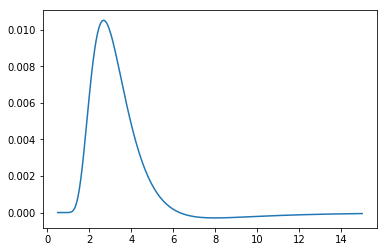

In [4]:
plt.plot(k, gamma)

In [5]:
k[np.argmax(gamma)]

2.685929648241206

In [7]:
data = np.loadtxt('results/HyCho_L=327.7_Nel=3200_T=5000_dt=0.02_Np=1.5e7_nuh=6e-3_xi=8.62e-5_bc=False_k=no_p=3_CV=off_amp=no_rel=on_wperp=0.55_1.txt')

In [8]:
data.shape

(46870, 11)

In [9]:
#tn = data[:, -1]
#bx = data[:, :64]

Nt = data[:, -1].shape[0] - 1
tn = np.linspace(0., 0.02*Nt, Nt + 1)

#bx = np.c_[bx, bx[:, 0]]

en_B = data[:, -4]

In [10]:
tn

array([0.0000e+00, 2.0000e-02, 4.0000e-02, ..., 9.3734e+02, 9.3736e+02,
       9.3738e+02])

In [9]:
T   = 300
Nt  = int(T/0.04)
Nel = 64
Lz  = 10.

w = np.linspace(0, Nt, Nt + 1) - Nt/2
w = 2*np.pi/T*w

k = np.linspace(0, Nel, Nel + 1) - Nel/2
k = 2*np.pi/Lz*k

In [125]:
Bxkw = np.fft.fft2(bx)
K, W = np.meshgrid(k, w)
Bxkw = np.fft.fftshift(Bxkw)
Bxkw_plot = np.abs(Bxkw)

Text(0,0.5,'w')

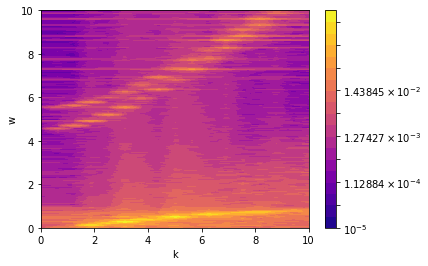

In [126]:
from matplotlib.colors import LogNorm

lvls = np.logspace(-5, 0, 20)
plt.contourf(K, W, Bxkw_plot/Bxkw_plot.max(), cmap = 'plasma', norm = LogNorm(), levels=lvls)

plt.xlim((0, 10))
plt.ylim((0, 10))

plt.colorbar()
plt.xlabel('k')
plt.ylabel('w')

In [13]:
omega1, gamma1, counter = fem.solveDispersionHybridRelativistic(k[np.argmax(gamma)], +1, 1., -1., wpe, wpa, wperp, nuh, 0.01, 1e-6, max_it=100)
#gamma2 = fem.solveDispersionHybridRelativistic(4*np.pi/10, +1, 1., -1., wpe, 0.2, 0.53, 6e-2, 0.01, 1e-6, max_it=100)[1]
#gamma3 = fem.solveDispersionHybridRelativistic(10*np.pi/10, +1, 1., -1., 2., 0.2, 0.53, 6e-2, 0.5, 1e-6, max_it=100)[1]

In [14]:
gamma1

0.010521254189406951

In [28]:
test

(0.23189283008682848+0.08889709395783314j)

In [14]:
gamma1

0.009724338724996881

Text(0.5,0,'$t\\Omega_\\mathrm{ce}$')

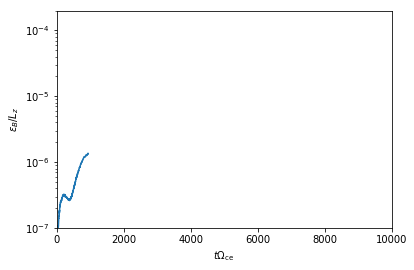

In [11]:
plt.semilogy(tn, en_B/L)
#plt.semilogy(tn, 1e-10*np.exp(2*gamma1*tn) + 1e-10*np.exp(2*gamma2*tn))
#plt.semilogy(tn, 1e-16*np.exp(2*gamma1*tn), 'k--')
plt.xlim((0, 10000))
plt.ylim(1e-7, 2e-4)

plt.ylabel('$\epsilon_B/L_z$')
plt.xlabel('$t\Omega_\mathrm{ce}$')

In [14]:
en_B[:100]

array([0.00000000e+00, 6.45582028e-10, 9.03761335e-09, 3.67994594e-08,
       8.64354604e-08, 1.46778129e-07, 2.02591310e-07, 2.46603502e-07,
       2.81284809e-07, 3.11292579e-07, 3.37566449e-07, 3.59115614e-07,
       3.77298352e-07, 3.95248716e-07, 4.13464396e-07, 4.28542280e-07,
       4.37359306e-07, 4.40968931e-07, 4.42766343e-07, 4.43531248e-07,
       4.40320328e-07, 4.30776677e-07, 4.16909953e-07, 4.03180727e-07,
       3.91519574e-07, 3.79877881e-07, 3.65833839e-07, 3.50037629e-07,
       3.35035967e-07, 3.21667877e-07, 3.08293860e-07, 2.93674448e-07,
       2.79100305e-07, 2.66740625e-07, 2.56801096e-07, 2.47711758e-07,
       2.39018436e-07, 2.32640687e-07, 2.30495895e-07, 2.31752844e-07,
       2.33578471e-07, 2.34356355e-07, 2.34965662e-07, 2.36587708e-07,
       2.38441334e-07, 2.38788150e-07, 2.37714303e-07, 2.37575565e-07,
       2.40292193e-07, 2.45144417e-07, 2.49991793e-07, 2.54050920e-07,
       2.58353163e-07, 2.63508692e-07, 2.68285588e-07, 2.71209747e-07,
      

Text(0.5,0,'$t\\Omega_\\mathrm{ce}$')

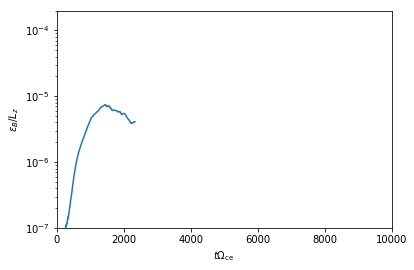

In [20]:
plt.semilogy(tn, en_B/L)
#plt.semilogy(tn, 1e-10*np.exp(2*gamma1*tn) + 1e-10*np.exp(2*gamma2*tn))
#plt.semilogy(tn, 1e-8*np.exp(2*gamma1*tn))
plt.xlim((0, 10000))
plt.ylim(1e-7, 2e-4)

plt.ylabel('$\epsilon_B/L_z$')
plt.xlabel('$t\Omega_\mathrm{ce}$')

In [13]:
B140 = data[:, 2]

2200.0
3000.0


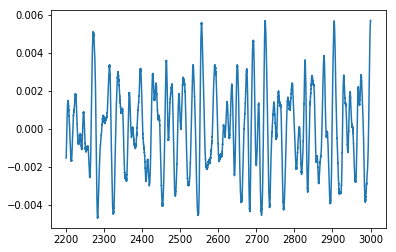

In [30]:
ta = 110000
tb = 150000

print(tn[ta])
print(tn[tb])
plt.plot(tn[ta:tb], B140[ta:tb])
#plt.xlim((700, 1500))
#plt.ylim((-0.025, 0.025))

In [14]:
1400/0.02

70000.0

Text(0.5,1,'$w_\\parallel=0.2c, w_\\perp=0.55c$')

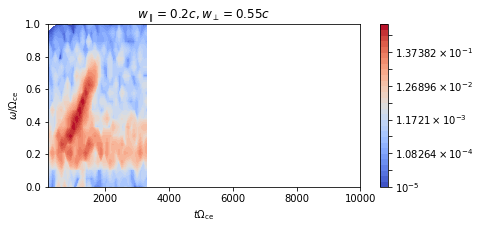

In [15]:
import scipy.signal as sig
from matplotlib.colors import LogNorm

f = plt.figure()
f.set_figheight(3)
f.set_figwidth(7)

f, t, Sxx = sig.spectrogram(B140, 1/0.02, nperseg=6000, noverlap=1256)
om = 2*np.pi*f

lvls = np.logspace(-5, 0, 30)
plt.contourf(t, om, Sxx/Sxx.max(), cmap='coolwarm', norm=LogNorm(), levels=lvls)
plt.xlim((200., 10000.))
plt.ylim((0., 1.))
plt.colorbar()

#plt.plot(np.ones(10)*700.,  np.linspace(0., 1., 10), 'w--')
#plt.plot(np.ones(10)*1500., np.linspace(0., 1., 10), 'w--')
plt.ylabel('$\omega/\Omega_\mathrm{ce}$')
plt.xlabel('$t\Omega_\mathrm{ce}$')

plt.title('$w_\parallel=0.2c, w_\perp=0.55c$')

In [106]:
om[1]-om[0]

0.05235987755982988

In [84]:
om

array([0.00000000e+00, 5.23598776e-02, 1.04719755e-01, ...,
       1.56974913e+02, 1.57027273e+02, 1.57079633e+02])

In [85]:
t

array([  60.  ,  134.88,  209.76,  284.64,  359.52,  434.4 ,  509.28,
        584.16,  659.04,  733.92,  808.8 ,  883.68,  958.56, 1033.44,
       1108.32, 1183.2 , 1258.08, 1332.96, 1407.84, 1482.72, 1557.6 ,
       1632.48, 1707.36, 1782.24, 1857.12, 1932.  , 2006.88, 2081.76,
       2156.64])

In [65]:
Nt = tb - ta

w = np.linspace(0, Nt, Nt + 1) - Nt/2
w = 2*np.pi/(Nt*0.04)*w


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt('spectrum_reflecting_draco.txt')

In [13]:
tn = data[:, -1]
bx = data[:, :128]

bx = np.c_[bx, bx[:, 0]]

In [16]:
Nt  = 6000
T   = Nt*0.05
Nel = 128
Lz  = 40.

w = np.linspace(0, Nt, Nt + 1) - Nt/2
w = 2*np.pi/T*w

k = np.linspace(0, Nel, Nel + 1) - Nel/2
k = 2*np.pi/Lz*k

In [19]:
Bxkw = np.fft.fft2(bx)
K, W = np.meshgrid(k, w)
Bxkw = np.fft.fftshift(Bxkw)
Bxkw_plot = np.abs(Bxkw)

Text(0,0.5,'w')

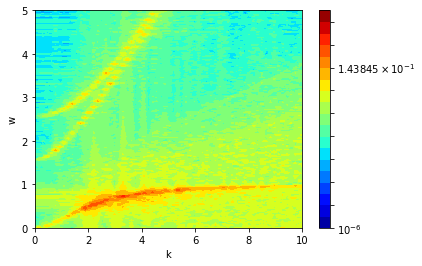

In [22]:
from matplotlib.colors import LogNorm

lvls = np.logspace(-6, 1, 20)
plt.contourf(K, W, Bxkw_plot/Bxkw_plot.max(), cmap = 'jet', norm = LogNorm(), levels=lvls)

plt.xlim((0, 10))
plt.ylim((0, 5))

plt.colorbar()
plt.xlabel('k')
plt.ylabel('w')

In [3]:
tn = data[:, -1]
bx = data[:, :130]

In [4]:
Nt  = 6000
T   = Nt*0.05
Nel = 128
Lz  = 40.

w = np.linspace(0, Nt, Nt + 1) - Nt/2
w = 2*np.pi/T*w

k = np.linspace(0, Nel, Nel + 1) - Nel/2
k = 2*np.pi/Lz*k

In [5]:
Bxkw = np.fft.fft2(bx[:, 1:])
K, W = np.meshgrid(k, w)
Bxkw = np.fft.fftshift(Bxkw)
Bxkw_plot = np.abs(Bxkw)

Text(0,0.5,'w')

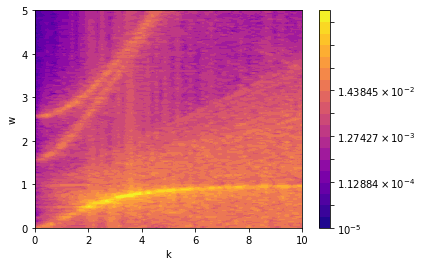

In [6]:
from matplotlib.colors import LogNorm

lvls = np.logspace(-5, 0, 20)
plt.contourf(K, W, Bxkw_plot/Bxkw_plot.max(), cmap = 'plasma', norm = LogNorm(), levels=lvls)

plt.xlim((0, 10))
plt.ylim((0, 5))

plt.colorbar()
plt.xlabel('k')
plt.ylabel('w')

# Impoved sampling strategy

In [24]:
Lz    = 327.7
xi    = 8.62e-5
nh0   = 6e-3
wpe   = 5.
wpa   = 0.2
wperp = 0.53

Ta = wperp**2/wpa**2 - 1.

B_background_z = lambda z : 1. + xi*(z - Lz/2)**2
nh = lambda z : nh0/(1 + Ta*(1 - 1/B_background_z(z)))

def g_sampling(z, kind):
    
    if kind == 'uniform':
        return 1/Lz
    
    elif kind == 'exact':
        return 1/Lz*1/(1 + Ta*(1 - 1/B_background_z(z)))
    
    elif kind == 'normal':
        sigma = 70.
        return 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(z - Lz/2)**2/(2*sigma**2))
    
    elif kind == 'cauchy':
        gamma = 50.
        z0 = Lz/2
        return 1/(np.pi*gamma)*(gamma**2/((z - z0)**2 + gamma**2))

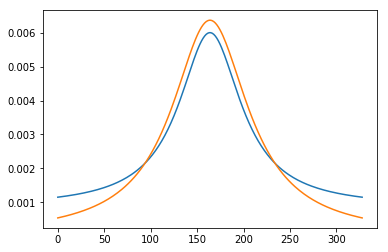

In [25]:
zplot = np.linspace(0., Lz, 200)

plt.plot(zplot, nh(zplot))
plt.plot(zplot, g_sampling(zplot, 'cauchy'))

In [70]:
from scipy.stats import cauchy
import sobol_seq

Np = int(1e6)
Nel = 300
dz = Lz/Nel
el_b = np.linspace(0., Lz, Nel + 1)

particles = np.zeros((Np, 2), dtype=float)

#particles[:, 0] = sobol_seq.i4_sobol_generate(1, Np).flatten()*Lz
#particles[:, 0] = np.random.rand(Np)*Lz
#particles[:, 0] = np.random.randn(Np)*sigma + Lz/2
#particles[:, 0] = cauchy.rvs(loc=Lz/2, scale=50., size=Np)

#particles[:, 1] = nh(particles[:, 0])/(g_sampling(particles[:, 0], 'uniform')*Np)

In [76]:
bins = np.digitize(particles[:, 0], el_b) - 1

In [77]:
n_h = np.zeros(Nel, dtype=float)

for i in range(Nel):
    n_h[i] = sum(particles[bins == i, 1])/dz

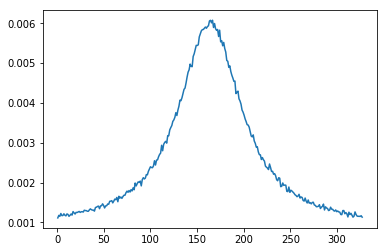

In [78]:
plt.plot(np.delete(el_b + dz/2, -1), n_h)
#plt.xlim((150., 160.))

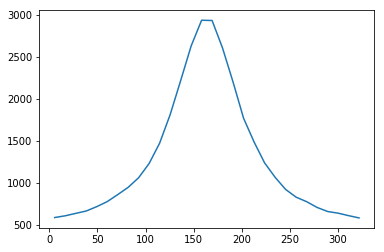

In [52]:
plt.plot(np.delete(el_b + dz/2, -1), n_h)

In [316]:
particles[:, 0].min()

-150.60622393992614

In [62]:
import scipy.integrate as integrate

In [63]:
integrate.quad(nh, 0., Lz)[0]/(nh0*Lz)

0.424836269704701

In [64]:
N = 1/(Ta + 1) + 2*Ta*np.arctan(np.sqrt(xi*(Ta + 1))*Lz/2)/(Lz*np.sqrt(xi)*(Ta + 1)**(3/2))
C = Ta*np.arctan(np.sqrt(xi*(Ta + 1))*Lz/2)/(Lz*np.sqrt(xi)*(Ta + 1)**(3/2))

In [65]:
N

0.4248362697047011

In [66]:
U = np.random.rand()
F = lambda U, z : U*N - z/(Lz*(Ta + 1)) - C - Ta*np.arctan(np.sqrt(xi*(Ta + 1))*(z - Lz/2))/(Lz*np.sqrt(xi)*(Ta + 1)**(3/2))
Fprime = lambda z : -1/(Lz*(Ta + 1)) - Ta/(Lz*np.sqrt(xi)*(Ta + 1)**(3/2))*np.sqrt(xi*(Ta + 1))/(1 + xi*(Ta + 1)*(z - Lz/2)**2)

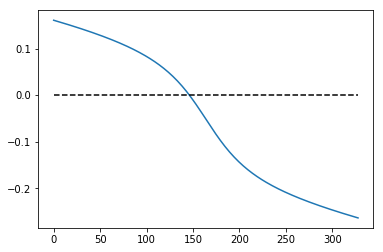

In [67]:
plt.plot(zplot, F(U, zplot))
plt.plot(zplot, np.zeros(len(zplot)), 'k--')

In [68]:
U

0.37889156555788805

In [46]:
z = Lz/2

In [72]:
z = z - F(U, z)/Fprime(z)
print(z)

125.35216583738959


In [71]:
for ip in range(Np):
    
    z = Lz/2
    U = np.random.rand()
    
    while True:
        z = z - F(U, z)/Fprime(z)
        
        if np.abs(F(U, z)) < 1e-5:
            particles[ip, 0] = z
            break
            
    if ip%10000 == 0:
        print(ip)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000


In [75]:
particles[:, 1] = nh0*Lz*N/Np

In [372]:
import sobol_seq

In [391]:
test = sobol_seq.i4_sobol_generate(2, 100000)

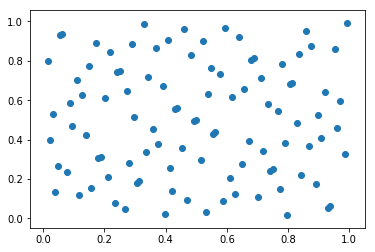

In [380]:
plt.scatter(test[:, 0], test[:, 1])

In [381]:
test = np.random.rand(2, 100)

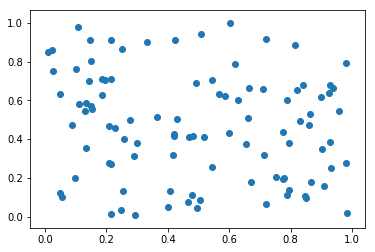

In [383]:
plt.scatter(test[0], test[1])

In [431]:
R = np.random.rand(100000)

In [432]:
import scipy.special as sp

In [433]:
test = sp.erfinv(2*R - 1)

In [434]:
bins = np.linspace(-4., 4., 4*8 + 1)

In [27]:
plt.hist(test, bins=bins)

NameError: name 'test' is not defined

In [15]:
data = np.loadtxt('results/test.txt')

In [16]:
dt = 0.0125
T  = 200.
Nt = int(T/dt)

In [20]:
tn    = np.linspace(0., T, Nt + 1)
en_H  = data[:, -2]
en_C  = data[:, -3]
en_B  = data[:, -4]
en_E  = data[:, -5]

en_Bx = data[:, -6]

en0 = en_H[0] + en_C[0] + en_B[0] + en_E[0]

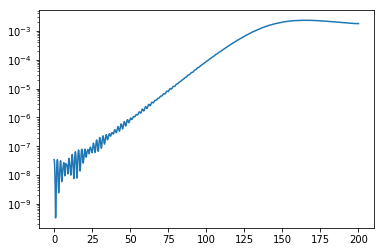

In [57]:
plt.semilogy(tn, en_B/en0)

In [63]:
Nta = int(0 /dt)
Ntb = int(125/dt)

Nt  = Ntb - Nta

T = Nt*dt

w = np.linspace(0, Nt, Nt + 1) - Nt/2
w = 2*np.pi*w/T

enBx_fft = np.fft.fft(en_Bx[Nta:Ntb+1]/en0) 
enBx_fft = np.abs(np.fft.fftshift(enBx_fft)) 

ana = fem.solveDispersionHybrid(2., +1, 1., -1., 2., 0.2, 0.53, 6e-2, 0.5 + 0j, 1e-6, max_it=100)[0]

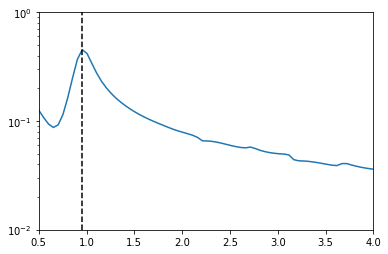

In [65]:
plt.semilogy(w, enBx_fft/enBx_fft.max())
plt.xlim((0.5, 4.))
plt.ylim((1e-2, 1e0))
plt.plot(np.ones(10)*2*np.real(ana), np.linspace(1e-2, 1e0, 10), 'k--')

In [68]:
data = np.loadtxt('results/run_L=327.7_Nel=3600_T=5000_dt=0.02_Np=1.5e7_nuh=6e-3_xi=8.62e-5_bc=False_k=none_p=2_CV=off_amp=none_rel=on_wperp=0.53.txt')

(1e-07, 0.0002)

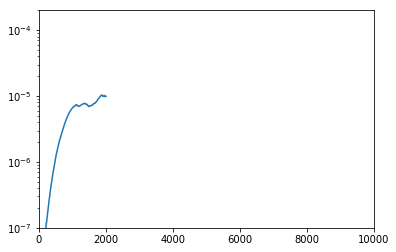

In [70]:
plt.semilogy(tn, en_B/L)
#plt.semilogy(tn, 1e-10*np.exp(2*gamma1*tn) + 1e-10*np.exp(2*gamma2*tn))
#plt.semilogy(tn, 1e-8*np.exp(2*gamma1*tn))
plt.xlim((0, 10000))
plt.ylim(1e-7, 2e-4)

In [12]:
B140 = data[:, 2]

Text(0.5,0,'$t\\Omega_\\mathrm{ce}$')

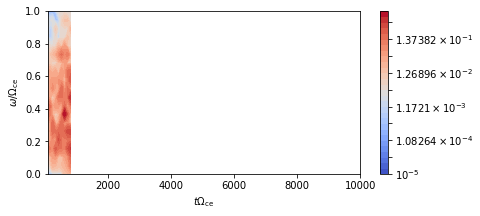

In [13]:
import scipy.signal as sig
from matplotlib.colors import LogNorm

f = plt.figure()
f.set_figheight(3)
f.set_figwidth(7)

f, t, Sxx = sig.spectrogram(B140, 1/0.02, nperseg=6000, noverlap=1256)
om = 2*np.pi*f

lvls = np.logspace(-5, 0, 30)
plt.contourf(t, om, Sxx/Sxx.max(), cmap='coolwarm', norm=LogNorm(), levels=lvls)
plt.xlim((100., 10000.))
plt.ylim((0., 1.))
plt.colorbar()

#plt.plot(np.ones(10)*700.,  np.linspace(0., 1., 10), 'w--')
#plt.plot(np.ones(10)*1500., np.linspace(0., 1., 10), 'w--')
plt.ylabel('$\omega/\Omega_\mathrm{ce}$')
plt.xlabel('$t\Omega_\mathrm{ce}$')

In [3]:
Lz    = 327.7
wpar  = 0.2
wperp = 0.55

Np    = int(1.5e7)

particles       = np.zeros((Np, 5), order='F', dtype=float)

#particles[:, 0] = np.random.rand (Np)*Lz
#particles[:, 1] = np.random.randn(Np)*wperp
#particles[:, 2] = np.random.randn(Np)*wperp
#particles[:, 3] = np.random.randn(Np)*wpar
particles[:, :4] = np.random.rand(Np, 4)

#particles = np.load('particles.npy')
np.save('test_particles_Np=1.5e7_4', particles)

In [6]:
import sobol_seq

Np = int(1.2e7)

particles = np.zeros((Np, 5), dtype=float, order='F')

particles[:, :4] = sobol_seq.i4_sobol_generate(4, Np)

In [7]:
np.save('test_particles_Np=1.2e7_sobol', particles)

In [59]:
particles[:, 1:4] = np.random.randn(Np, 3)

(array([1.900000e+01, 8.700000e+01, 3.620000e+02, 1.385000e+03,
        4.980000e+03, 1.511200e+04, 4.100700e+04, 9.893000e+04,
        2.140560e+05, 4.093690e+05, 6.944260e+05, 1.045812e+06,
        1.407854e+06, 1.675950e+06, 1.778000e+06, 1.678174e+06,
        1.407198e+06, 1.048427e+06, 6.939340e+05, 4.084950e+05,
        2.135390e+05, 9.946600e+04, 4.131600e+04, 1.524000e+04,
        4.963000e+03, 1.418000e+03, 3.680000e+02, 8.300000e+01,
        2.000000e+01]),
 array([-5.        , -4.65517241, -4.31034483, -3.96551724, -3.62068966,
        -3.27586207, -2.93103448, -2.5862069 , -2.24137931, -1.89655172,
        -1.55172414, -1.20689655, -0.86206897, -0.51724138, -0.17241379,
         0.17241379,  0.51724138,  0.86206897,  1.20689655,  1.55172414,
         1.89655172,  2.24137931,  2.5862069 ,  2.93103448,  3.27586207,
         3.62068966,  3.96551724,  4.31034483,  4.65517241,  5.        ]),
 <a list of 29 Patch objects>)

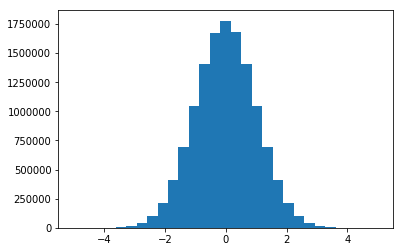

In [63]:
plt.hist(particles[:, 2], bins = np.linspace(-5., 5., 30))

In [66]:
test = np.load('test_particles_Np=1.3e7_1.npy')